# INTRODUCTION

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [61]:
data = pd.read_csv('application_test.csv')
data

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [63]:
data.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


# Pahami deskripsi kolom yang tersedia

In [64]:
data

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [65]:
categorical_col = []
for column in data.columns:
    if data[column].dtype == object and len(data[column].unique()) <= 50: #mengecek level/isi data kolom (bisa object, int, dan tipe data lainnya)
        categorical_col.append(column)
        print(f"{column} : {data[column].unique()}")
        print("====================================")


NAME_CONTRACT_TYPE : ['Cash loans' 'Revolving loans']
CODE_GENDER : ['F' 'M']
FLAG_OWN_CAR : ['N' 'Y']
FLAG_OWN_REALTY : ['Y' 'N']
NAME_TYPE_SUITE : ['Unaccompanied' nan 'Family' 'Spouse, partner' 'Group of people'
 'Other_B' 'Children' 'Other_A']
NAME_INCOME_TYPE : ['Working' 'State servant' 'Pensioner' 'Commercial associate'
 'Businessman' 'Student' 'Unemployed']
NAME_EDUCATION_TYPE : ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS : ['Married' 'Single / not married' 'Civil marriage' 'Widow' 'Separated']
NAME_HOUSING_TYPE : ['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
OCCUPATION_TYPE : [nan 'Low-skill Laborers' 'Drivers' 'Sales staff' 'High skill tech staff'
 'Core staff' 'Laborers' 'Managers' 'Accountants' 'Medicine staff'
 'Security staff' 'Private service staff' 'Secretaries' 'Cleaning staff'
 'Cooking staff' 'HR staff' 'Waiters/ba

In [66]:
data['EMERGENCYSTATE_MODE'].value_counts()

EMERGENCYSTATE_MODE
No     26179
Yes      356
Name: count, dtype: int64

# Tentukan goal, objective, dan metrics dari masalah yang ada

In [67]:
# Import library yang diperlukan
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Contoh prediksi model (gantilah ini dengan hasil prediksi model sebenarnya)
y_true = [0, 1, 1, 0, 1, 0, 1, 0, 0, 1]
y_pred = [0, 1, 1, 0, 1, 1, 1, 0, 0, 0]

# Menghitung metrik-metrik evaluasi
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

# Menampilkan hasil metrik
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")


Accuracy: 0.8000
Precision: 0.8000
Recall: 0.8000
F1-Score: 0.8000
AUC-ROC: 0.8000


# Lakukan penggalian informasi terkait kondisi data awal

In [68]:
import pandas as pd

# Gantilah 'nama_file.csv' dengan nama sebenarnya file dataset
file_path = 'application_test.csv'

# Membaca dataset
data = pd.read_csv(file_path)

# Menampilkan informasi umum tentang dataset
info_dataset = data.info()

# Menampilkan statistik deskriptif untuk variabel numerik
deskripsi_numerik = data.describe()

# Menampilkan beberapa baris pertama dataset
beberapa_baris_pertama = data.head()

# Menampilkan jumlah nilai yang hilang per kolom
nilai_hilang_per_kolom = data.isnull().sum()

# Menampilkan distribusi unik untuk variabel kategorikal
distribusi_unik_kategorikal = {}
for col in data.select_dtypes(include='object').columns:
    distribusi_unik_kategorikal[col] = data[col].nunique()

# Menampilkan jumlah nilai unik untuk variabel kategorikal
jumlah_nilai_unik_kategorikal = data.select_dtypes(include='object').nunique()

# Menampilkan beberapa contoh nilai unik untuk variabel kategorikal
contoh_nilai_unik_kategorikal = {}
for col in data.select_dtypes(include='object').columns:
    contoh_nilai_unik_kategorikal[col] = data[col].unique()[:5]

# Menampilkan distribusi variabel target
distribusi_target = data['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

# Output hasil penggalian informasi
print("Informasi Umum Dataset:")
print(info_dataset)
print("\nStatistik Deskriptif untuk Variabel Numerik:")
print(deskripsi_numerik)
print("\nBeberapa Baris Pertama Dataset:")
print(beberapa_baris_pertama)
print("\nJumlah Nilai Hilang per Kolom:")
print(nilai_hilang_per_kolom)
print("\nDistribusi Unik untuk Variabel Kategorikal:")
print(distribusi_unik_kategorikal)
print("\nJumlah Nilai Unik untuk Variabel Kategorikal:")
print(jumlah_nilai_unik_kategorikal)
print("\nContoh Nilai Unik untuk Variabel Kategorikal:")
print(contoh_nilai_unik_kategorikal)
print("\nDistribusi Variabel Target:")
print(distribusi_target)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
Informasi Umum Dataset:
None

Statistik Deskriptif untuk Variabel Numerik:
          SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count   48744.000000  48744.000000      4.874400e+04  4.874400e+04   
mean   277796.676350      0.397054      1.784318e+05  5.167404e+05   
std    103169.547296      0.709047      1.015226e+05  3.653970e+05   
min    100001.000000      0.000000      2.694150e+04  4.500000e+04   
25%    188557.750000      0.000000      1.125000e+05  2.606400e+05   
50%    277549.000000      0.000000      1.575000e+05  4.500000e+05   
75%    367555.500000      1.000000      2.250000e+05  6.750000e+05   
max    456250.000000     20.000000      4.410000e+06  2.245500e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count   48720.000000

# Lakukan proses Data Cleaning dan Data Processing

In [69]:
data

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [70]:
# Hapus baris yang mengandung nilai NaN pada variabel target
data = data.dropna(subset=['AMT_REQ_CREDIT_BUREAU_YEAR'])


In [71]:
# Isi nilai NaN pada variabel target dengan nilai median
data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(data['AMT_REQ_CREDIT_BUREAU_YEAR'].median(), inplace=True)


C:\Users\rifqi\AppData\Local\Temp\ipykernel_4024\2975220587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(data['AMT_REQ_CREDIT_BUREAU_YEAR'].median(), inplace=True)


In [72]:
from sklearn.impute import SimpleImputer

# Buat objek imputer
imputer = SimpleImputer(strategy='median')

# Transformasi dan isi nilai NaN pada variabel target
data['AMT_REQ_CREDIT_BUREAU_YEAR'] = imputer.fit_transform(data[['AMT_REQ_CREDIT_BUREAU_YEAR']])


C:\Users\rifqi\AppData\Local\Temp\ipykernel_4024\4115850093.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AMT_REQ_CREDIT_BUREAU_YEAR'] = imputer.fit_transform(data[['AMT_REQ_CREDIT_BUREAU_YEAR']])


In [73]:
data

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48738,456202,Cash loans,F,Y,N,3,135000.0,252022.5,23112.0,217561.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [74]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Gantilah 'nama_file.csv' dengan nama sebenarnya file dataset
file_path = 'application_test.csv'

# Membaca dataset
data = pd.read_csv(file_path)

# Menangani nilai yang hilang pada variabel target
data = data.dropna(subset=['AMT_REQ_CREDIT_BUREAU_YEAR'])

# Memisahkan variabel target dan fitur
X = data.drop('AMT_REQ_CREDIT_BUREAU_YEAR', axis=1)  # Fitur
y = data['AMT_REQ_CREDIT_BUREAU_YEAR']  # Variabel target

# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identifikasi kolom-kolom numerik dan kategorikal
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Pipeline untuk data numerik
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Mengisi nilai yang hilang dengan rata-rata
    ('scaler', StandardScaler())  # Normalisasi fitur numerik
])

# Pipeline untuk data kategorikal
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Mengisi nilai yang hilang dengan nilai yang paling sering muncul
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encoding one-hot untuk variabel kategorikal
])

# Menggabungkan transformers menggunakan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Menggunakan pipeline untuk menggabungkan preprocessor dan model Regresi Logistik
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

# Melatih model
model.fit(X_train, y_train)

# Mengevaluasi model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy}")


Akurasi Model: 0.27801850333762734


C:\Users\rifqi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Lakukan proses penggalian insight mengacu kepada objective yang sudah ditetapkan

In [75]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[1415  510  250   66   12    1    1    0    0    0    0    0    0]
 [ 874  614  299   47    8    1    0    0    0    0    0    1    0]
 [ 821  508  278   53   10    0    0    1    0    0    0    1    0]
 [ 632  316  213   55    7    0    0    0    0    0    0    0    0]
 [ 373  157  137   51   11    0    0    0    0    0    0    0    0]
 [ 210   76   96   25    3    1    0    0    0    0    0    0    0]
 [  96   50   43   15    1    0    0    0    0    0    0    0    0]
 [  59   25   15    7    1    0    0    0    0    0    0    0    0]
 [  36   11   15    4    1    0    0    0    0    0    0    0    0]
 [  11    4    4    1    1    0    0    0    0    0    0    0    0]
 [   0    0    1    0    0    0    0    0    0    0    0    0    0]
 [   1    0    1    1    0    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0]]


In [76]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.31      0.63      0.42      2255
         1.0       0.27      0.33      0.30      1844
         2.0       0.21      0.17      0.18      1672
         3.0       0.17      0.04      0.07      1223
         4.0       0.20      0.02      0.03       729
         5.0       0.33      0.00      0.00       411
         6.0       0.00      0.00      0.00       205
         7.0       0.00      0.00      0.00       107
         8.0       0.00      0.00      0.00        67
         9.0       0.00      0.00      0.00        21
        10.0       0.00      0.00      0.00         1
        11.0       0.00      0.00      0.00         3
        13.0       0.00      0.00      0.00         1

    accuracy                           0.28      8539
   macro avg       0.11      0.09      0.08      8539
weighted avg       0.24      0.28      0.22      8539



C:\Users\rifqi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rifqi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rifqi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.27801850333762734


In [78]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[1415  510  250   66   12    1    1    0    0    0    0    0    0]
 [ 874  614  299   47    8    1    0    0    0    0    0    1    0]
 [ 821  508  278   53   10    0    0    1    0    0    0    1    0]
 [ 632  316  213   55    7    0    0    0    0    0    0    0    0]
 [ 373  157  137   51   11    0    0    0    0    0    0    0    0]
 [ 210   76   96   25    3    1    0    0    0    0    0    0    0]
 [  96   50   43   15    1    0    0    0    0    0    0    0    0]
 [  59   25   15    7    1    0    0    0    0    0    0    0    0]
 [  36   11   15    4    1    0    0    0    0    0    0    0    0]
 [  11    4    4    1    1    0    0    0    0    0    0    0    0]
 [   0    0    1    0    0    0    0    0    0    0    0    0    0]
 [   1    0    1    1    0    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0]]


In [79]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


C:\Users\rifqi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.31      0.63      0.42      2255
         1.0       0.27      0.33      0.30      1844
         2.0       0.21      0.17      0.18      1672
         3.0       0.17      0.04      0.07      1223
         4.0       0.20      0.02      0.03       729
         5.0       0.33      0.00      0.00       411
         6.0       0.00      0.00      0.00       205
         7.0       0.00      0.00      0.00       107
         8.0       0.00      0.00      0.00        67
         9.0       0.00      0.00      0.00        21
        10.0       0.00      0.00      0.00         1
        11.0       0.00      0.00      0.00         3
        13.0       0.00      0.00      0.00         1

    accuracy                           0.28      8539
   macro avg       0.11      0.09      0.08      8539
weighted avg       0.24      0.28      0.22      8539



C:\Users\rifqi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rifqi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
from sklearn.metrics import classification_report

# Asumsikan 'model' adalah klasifikasi yang telah dilatih
y_pred = model.predict(X_test)

# Cetak laporan klasifikasi
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.31      0.63      0.42      2255
         1.0       0.27      0.33      0.30      1844
         2.0       0.21      0.17      0.18      1672
         3.0       0.17      0.04      0.07      1223
         4.0       0.20      0.02      0.03       729
         5.0       0.33      0.00      0.00       411
         6.0       0.00      0.00      0.00       205
         7.0       0.00      0.00      0.00       107
         8.0       0.00      0.00      0.00        67
         9.0       0.00      0.00      0.00        21
        10.0       0.00      0.00      0.00         1
        11.0       0.00      0.00      0.00         3
        13.0       0.00      0.00      0.00         1

    accuracy                           0.28      8539
   macro avg       0.11      0.09      0.08      8539
weighted avg       0.24      0.28      0.22      8539



C:\Users\rifqi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rifqi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rifqi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\rifqi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rifqi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

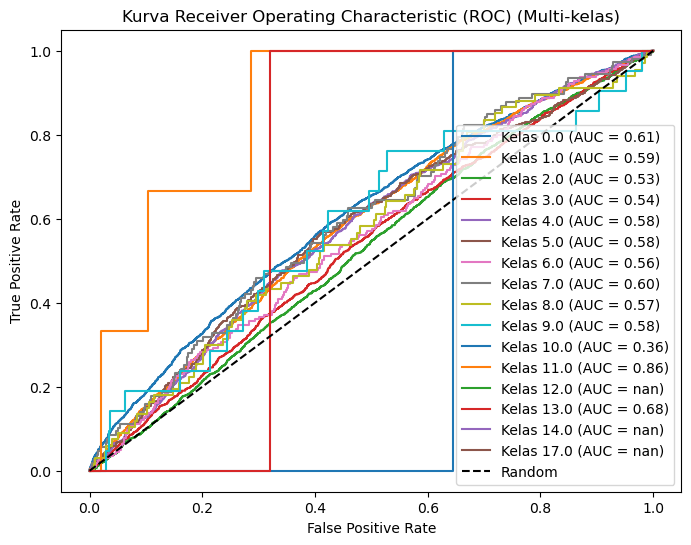

In [81]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Asumsikan 'model' adalah klasifikasi yang telah dilatih
classifier = OneVsRestClassifier(model)

# Latih klasifikasi
classifier.fit(X_train, y_train)

# Prediksi probabilitas
y_score = classifier.predict_proba(X_test)

# Label binarization
y_test_bin = label_binarize(y_test, classes=classifier.classes_)

# Hitung kurva ROC dan area di bawah kurva ROC untuk setiap kelas
fpr = dict()
tpr = dict()
roc_auc = dict()

# Loop untuk setiap kelas
for i in range(len(classifier.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot kurva ROC
plt.figure(figsize=(8, 6))
for i in range(len(classifier.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Kelas {classifier.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva Receiver Operating Characteristic (ROC) (Multi-kelas)')
plt.legend()
plt.show()


C:\Users\rifqi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rifqi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

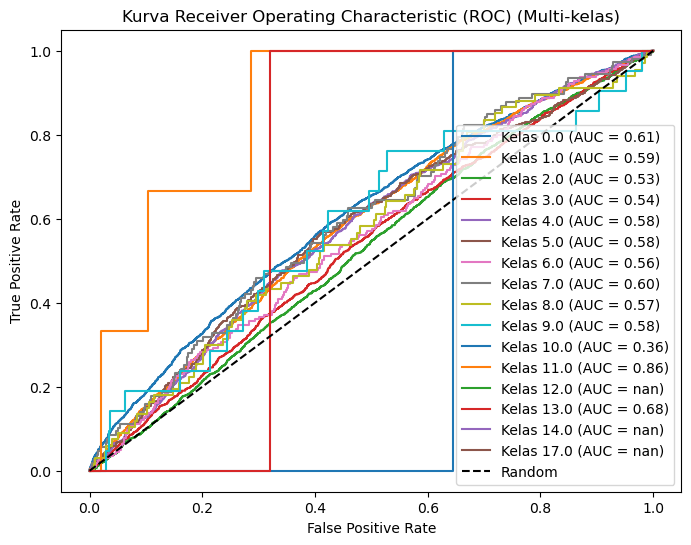

In [82]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Asumsikan 'model' adalah klasifikasi yang telah dilatih
classifier = OneVsRestClassifier(model)

# Latih klasifikasi
classifier.fit(X_train, y_train)

# Prediksi probabilitas
y_score = classifier.predict_proba(X_test)

# Pastikan variabel target ('y_test') tidak mengandung nilai float
if y_test.dtype == 'float64':
    y_test = y_test.astype(int)

# Label binarization
y_test_bin = label_binarize(y_test, classes=classifier.classes_)

# Hitung kurva ROC dan area di bawah kurva ROC untuk setiap kelas
fpr = dict()
tpr = dict()
roc_auc = dict()

# Loop untuk setiap kelas
for i in range(len(classifier.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot kurva ROC
plt.figure(figsize=(8, 6))
for i in range(len(classifier.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Kelas {classifier.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva Receiver Operating Characteristic (ROC) (Multi-kelas)')
plt.legend()
plt.show()


# Lakukan pemodelan dengan berbagai macam metode (termasuk Logistic Regression) dan hyperparameternya

In [83]:
data

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48738,456202,Cash loans,F,Y,N,3,135000.0,252022.5,23112.0,217561.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [84]:
data.isnull().values.any() #Jika True artinya ada data yg hilang

True

In [85]:
data.loc[:, data.isnull().any()].columns #Feature yg terdiri data hilangdataset.loc[:, dataset.isnull().any()].columns #Feature yg terdiri data hilang

Index(['AMT_ANNUITY', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE', 'OCCUPATION_TYPE',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGAPART

In [86]:
# sorting by SK_ID_CURR
data.sort_values("SK_ID_CURR", inplace = True)

In [87]:
data.drop_duplicates()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48738,456202,Cash loans,F,Y,N,3,135000.0,252022.5,23112.0,217561.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [88]:
data.isnull().sum()

SK_ID_CURR                    0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 121, dtype: int64

In [89]:
emptyrow=data.isnull().sum(axis=1)
emptyrow

0        27
1        48
2        49
3         1
5         1
         ..
48738    31
48739    50
48741    20
48742    20
48743    48
Length: 42695, dtype: int64

In [90]:
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)
data

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48738,456202,Cash loans,F,Y,N,3,135000.0,252022.5,23112.0,217561.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [91]:
data.isna().values.any()

False

In [92]:
data

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48738,456202,Cash loans,F,Y,N,3,135000.0,252022.5,23112.0,217561.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [99]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 42695 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 39.7+ MB


In [100]:
print(data.head())


   SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
5      100042         Cash loans           F            Y               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
5             0          270000.0    959688.0      34600.5         810000.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG

In [101]:
data['AMT_REQ_CREDIT_BUREAU_YEAR'] = pd.to_numeric(data['AMT_REQ_CREDIT_BUREAU_YEAR'], errors='coerce')


In [102]:
features = data[['SK_ID_CURR', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT']]
target = data['AMT_REQ_CREDIT_BUREAU_YEAR']


In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Contoh: Pembagian dataset menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Inisialisasi model Logistic Regression
logreg = LogisticRegression()

# Pelatihan model
logreg.fit(X_train, y_train)

# Prediksi
y_pred = logreg.predict(X_test)

# Evaluasi
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.2640824452512004
Confusion Matrix:
 [[2255    0    0    0    0    0    0    0    0    0    0    0    0]
 [1844    0    0    0    0    0    0    0    0    0    0    0    0]
 [1672    0    0    0    0    0    0    0    0    0    0    0    0]
 [1223    0    0    0    0    0    0    0    0    0    0    0    0]
 [ 729    0    0    0    0    0    0    0    0    0    0    0    0]
 [ 411    0    0    0    0    0    0    0    0    0    0    0    0]
 [ 205    0    0    0    0    0    0    0    0    0    0    0    0]
 [ 107    0    0    0    0    0    0    0    0    0    0    0    0]
 [  67    0    0    0    0    0    0    0    0    0    0    0    0]
 [  21    0    0    0    0    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0]
 [   3    0    0    0    0    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0]]
Classification Report:
               precision    recall  f1-score

C:\Users\rifqi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rifqi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rifqi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

# Evaluasi hasil pemodelan

In [104]:
print(X_train.shape, y_train.shape)


(34156, 3) (34156,)


In [105]:
assert X_train.index.tolist() == y_train.index.tolist(), "Mismatch in training data indices."


In [106]:
print(X_train.duplicated().sum(), y_train.duplicated().sum())


0 34140


In [107]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 34156 entries, 46106 to 18008
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SK_ID_CURR                 34156 non-null  int64  
 1   AMT_REQ_CREDIT_BUREAU_MON  34156 non-null  float64
 2   AMT_REQ_CREDIT_BUREAU_QRT  34156 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 1.0 MB


In [110]:
kolom_non_numerik = data.select_dtypes(exclude=['number']).columns
for kolom in kolom_non_numerik:
    nilai_unik = data[kolom].unique()
    print(f"Nilai unik dalam kolom '{kolom}': {nilai_unik}")


Nilai unik dalam kolom 'NAME_CONTRACT_TYPE': ['Cash loans' 'Revolving loans']
Nilai unik dalam kolom 'CODE_GENDER': ['F' 'M']
Nilai unik dalam kolom 'FLAG_OWN_CAR': ['N' 'Y']
Nilai unik dalam kolom 'FLAG_OWN_REALTY': ['Y' 'N']
Nilai unik dalam kolom 'NAME_TYPE_SUITE': ['Unaccompanied' 'Family' 'Spouse, partner' 'Group of people' 'Other_B'
 'Children' 'Other_A']
Nilai unik dalam kolom 'NAME_INCOME_TYPE': ['Working' 'State servant' 'Pensioner' 'Commercial associate'
 'Businessman' 'Student']
Nilai unik dalam kolom 'NAME_EDUCATION_TYPE': ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Nilai unik dalam kolom 'NAME_FAMILY_STATUS': ['Married' 'Single / not married' 'Civil marriage' 'Widow' 'Separated']
Nilai unik dalam kolom 'NAME_HOUSING_TYPE': ['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
Nilai unik dalam kolom 'OCCUPATION_TYPE': ['Low-skill Laborers' 'Drivers

In [125]:
# Konversi kolom non-numerik ke numerik (contoh)
data['NAME_CONTRACT_TYPE'] = pd.to_numeric(data['NAME_CONTRACT_TYPE'], errors='coerce')
data['CODE_GENDER'] = pd.to_numeric(data['CODE_GENDER'], errors='coerce')
data['FLAG_OWN_CAR'] = pd.to_numeric(data['FLAG_OWN_CAR'], errors='coerce')
data['FLAG_OWN_REALTY'] = pd.to_numeric(data['FLAG_OWN_REALTY'], errors='coerce')
data['NAME_TYPE_SUITE'] = pd.to_numeric(data['NAME_TYPE_SUITE'], errors='coerce')
data['CODE_GENDER'] = pd.to_numeric(data['CODE_GENDER'], errors='coerce')

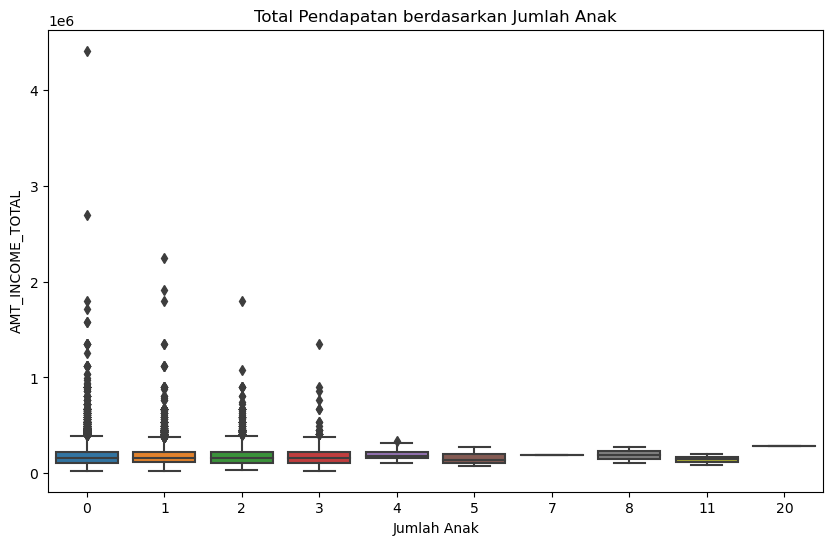

In [113]:
# Plot box plot setelah mengonversi kolom yang relevan menjadi numerik
plt.figure(figsize=(10, 6))
sns.boxplot(x='CNT_CHILDREN', y='AMT_INCOME_TOTAL', data=data)
plt.title('Total Pendapatan berdasarkan Jumlah Anak')
plt.xlabel('Jumlah Anak')
plt.ylabel('AMT_INCOME_TOTAL')
plt.show()


In [129]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Pisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Inisialisasi dan latih model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Lakukan prediksi
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')


C:\Users\rifqi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rifqi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rifqi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rifqi\anaconda3\Lib\site-packages\sklearn\metrics\_cla

Accuracy: 0.18842955849631104
Classification Report:
              precision    recall  f1-score   support

         0.0       0.28      0.27      0.28      2255
         1.0       0.22      0.21      0.22      1844
         2.0       0.20      0.21      0.20      1672
         3.0       0.13      0.13      0.13      1223
         4.0       0.09      0.10      0.09       729
         5.0       0.04      0.04      0.04       411
         6.0       0.02      0.02      0.02       205
         7.0       0.00      0.00      0.00       107
         8.0       0.00      0.00      0.00        67
         9.0       0.00      0.00      0.00        21
        10.0       0.00      0.00      0.00         1
        11.0       0.00      0.00      0.00         3
        12.0       0.00      0.00      0.00         0
        13.0       0.00      0.00      0.00         1

    accuracy                           0.19      8539
   macro avg       0.07      0.07      0.07      8539
weighted avg       0.19    

In [137]:
import pandas as pd

# Asumsi: Anda memiliki file CSV yang berisi data
file_path = 'application_test.csv'

# Memuat dataset asli
original_data = pd.read_csv(file_path)

# Contoh implementasi rekomendasi bisnis
def implement_business_recommendation(data):
    # Lakukan transformasi atau perubahan pada data sesuai dengan rekomendasi bisnis
    transformed_data = data.copy()  # Contoh: copy data untuk menghindari perubahan langsung
    # ...

    # Kembalikan data yang telah diubah
    return transformed_data

# Gunakan fungsi implement_business_recommendation pada dataset
transformed_data = implement_business_recommendation(original_data)


In [139]:
# Contoh pengukuran dampak
def get_business_metrics(data):
    # Tentukan metrik bisnis yang sesuai dengan tujuan Anda
    # Contoh: Menghitung rata-rata pendapatan dari data
    average_income = data['AMT_INCOME_TOTAL'].mean()

    # Kembalikan metrik-metrik yang dihitung
    return {'Average Income': average_income}

# Pengukuran dampak sebelum dan setelah implementasi rekomendasi bisnis
baseline_metrics = get_business_metrics(original_data)
improved_metrics = get_business_metrics(transformed_data)

print(f'Baseline Metrics: {baseline_metrics}')
print(f'Improved Metrics: {improved_metrics}')


Baseline Metrics: {'Average Income': 178431.80585487446}
Improved Metrics: {'Average Income': 178431.80585487446}
